# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mediapipe as mp

# Data Loading & Exploration

In [2]:
df = pd.read_csv(r"hand_landmarks_data.csv")
df

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,259.135620,277.542236,4.323656e-07,271.098221,257.333374,0.007132,269.350250,237.538345,0.004480,257.334503,...,231.102150,230.308350,-0.028861,235.017242,235.029312,-0.016911,237.608711,240.918411,-0.006697,two_up_inverted
25671,90.063995,256.181732,3.808555e-07,77.302231,237.829132,0.003778,78.658888,220.471680,-0.001519,89.374163,...,116.692326,210.932007,-0.043690,112.681984,215.274353,-0.029510,110.178349,221.338379,-0.015630,two_up_inverted
25672,236.724518,251.496756,5.912488e-07,254.918358,232.369956,0.001354,256.002502,209.969106,-0.001674,247.075447,...,211.933777,202.389975,-0.031740,215.493393,208.953272,-0.021970,218.057648,215.236920,-0.010803,two_up_inverted
25673,119.466957,309.842529,4.319564e-07,111.772064,291.310333,0.006174,116.895447,273.683929,0.001893,129.239788,...,157.217422,271.056702,-0.046297,154.780106,277.261139,-0.032800,150.117119,282.011047,-0.020277,two_up_inverted


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

All columns are float64 types. I will change the data type in order to lower the memory consumption and speed up computations for model training

In [3]:
for i in range(len(df.columns)-1):
    col = df.columns[i]
    df[col] = df[col].astype("float32")
df

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669983,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882965,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351776,346.059113,-2.345265e-07,81.925034,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451614,341.794434,-0.038175,142.773590,342.829254,-0.037336,152.431702,343.015991,-0.036136,call
2,187.756973,260.235504,-2.417307e-07,195.460571,241.506042,-0.000184,207.259537,223.674347,-0.009687,215.413620,...,250.301010,268.602936,-0.044068,262.425140,271.276642,-0.040469,272.989960,272.272217,-0.038301,call
3,114.976700,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053192,329.712341,-0.027863,155.990356,329.548828,-0.027723,call
4,188.795288,141.727875,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010559,-0.008115,192.552521,...,226.696396,132.263245,-0.025113,234.831741,130.684143,-0.024087,241.587769,128.477188,-0.023486,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,259.135620,277.542236,4.323656e-07,271.098206,257.333374,0.007132,269.350250,237.538345,0.004480,257.334503,...,231.102142,230.308350,-0.028861,235.017242,235.029312,-0.016911,237.608704,240.918411,-0.006697,two_up_inverted
25671,90.063995,256.181732,3.808555e-07,77.302231,237.829132,0.003778,78.658890,220.471680,-0.001519,89.374161,...,116.692322,210.932007,-0.043690,112.681984,215.274353,-0.029510,110.178345,221.338379,-0.015630,two_up_inverted
25672,236.724518,251.496750,5.912488e-07,254.918365,232.369949,0.001354,256.002502,209.969101,-0.001674,247.075455,...,211.933777,202.389969,-0.031740,215.493393,208.953278,-0.021970,218.057648,215.236923,-0.010803,two_up_inverted
25673,119.466957,309.842529,4.319564e-07,111.772064,291.310333,0.006174,116.895447,273.683929,0.001893,129.239792,...,157.217422,271.056702,-0.046297,154.780106,277.261139,-0.032800,150.117126,282.011047,-0.020277,two_up_inverted


We can see that values aren't affected that much at all. But let's look at memory usage.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float32
 1   y1      25675 non-null  float32
 2   z1      25675 non-null  float32
 3   x2      25675 non-null  float32
 4   y2      25675 non-null  float32
 5   z2      25675 non-null  float32
 6   x3      25675 non-null  float32
 7   y3      25675 non-null  float32
 8   z3      25675 non-null  float32
 9   x4      25675 non-null  float32
 10  y4      25675 non-null  float32
 11  z4      25675 non-null  float32
 12  x5      25675 non-null  float32
 13  y5      25675 non-null  float32
 14  z5      25675 non-null  float32
 15  x6      25675 non-null  float32
 16  y6      25675 non-null  float32
 17  z6      25675 non-null  float32
 18  x7      25675 non-null  float32
 19  y7      25675 non-null  float32
 20  z7      25675 non-null  float32
 21  x8      25675 non-null  float32
 22

Memory was naturally reduced to half the original. We could even reduce this to 3+ MB but for better accuracy, let's leave it at that.

In [9]:
null_counts = df.isna().sum()
null_counts = null_counts[null_counts > 0]  # Only keep columns with nulls
null_counts

Series([], dtype: int64)

There is no missing values in the dataset

# Data Visualization

The data has 63 columns excluding the label of the gesture, each 3 represent (x,y,z) of a point in the fingers of the hand. 

We have 21 hand points in total which move freely in front of the camera.

The points numbers are mapped on the hand from 0 to 20 as follows:

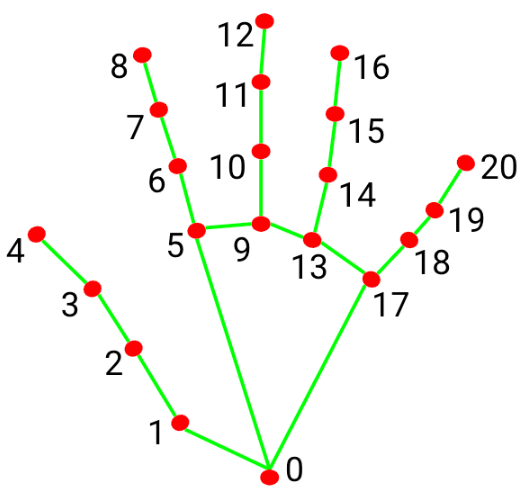
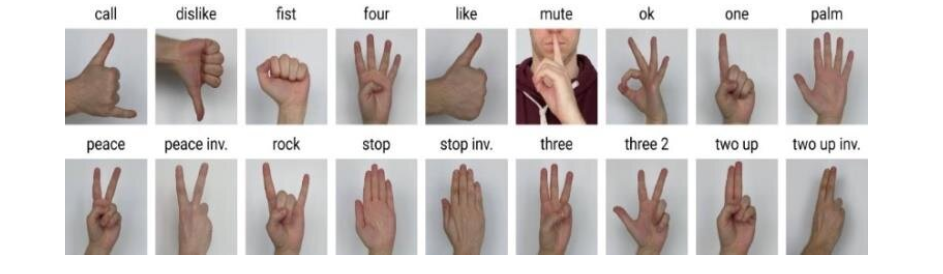

If we want to see each gesture we can do the following:

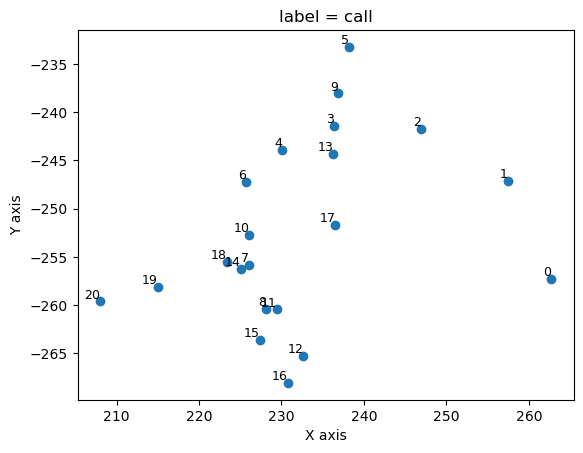

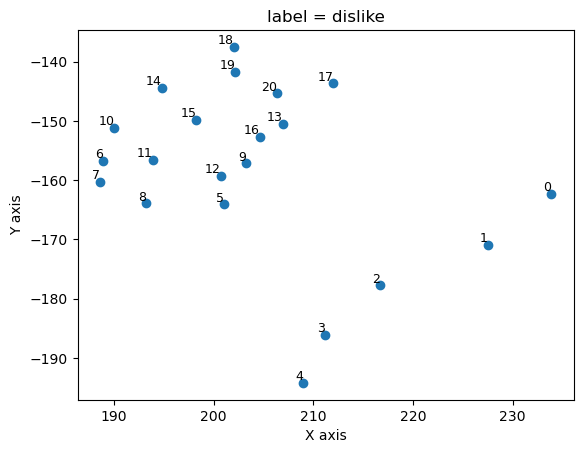

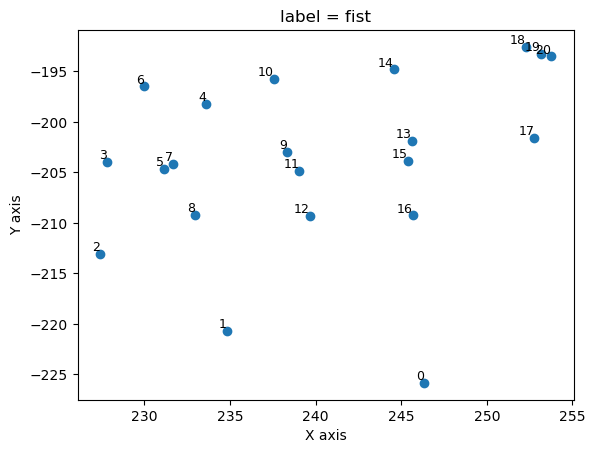

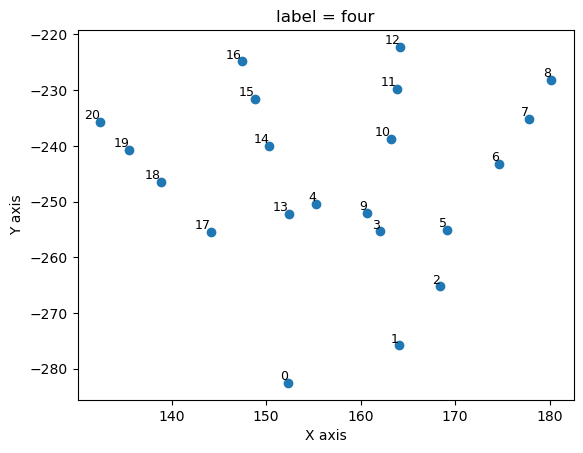

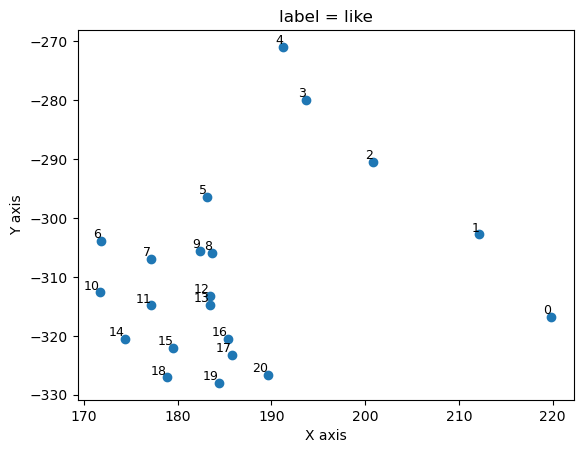

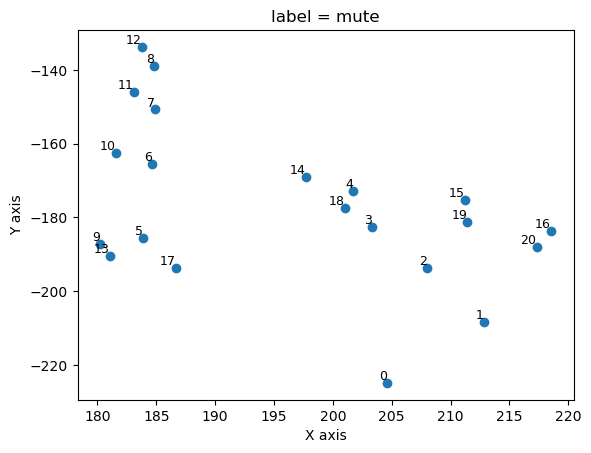

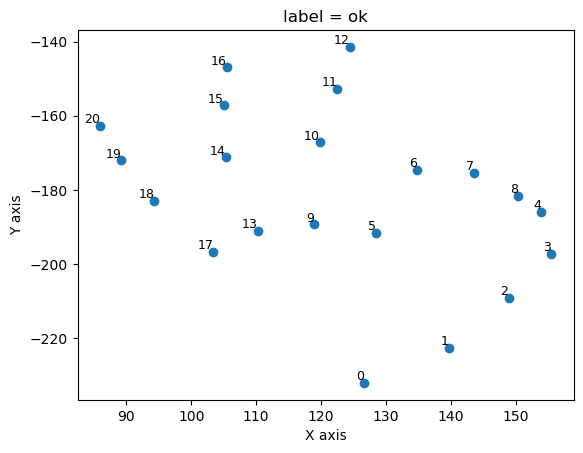

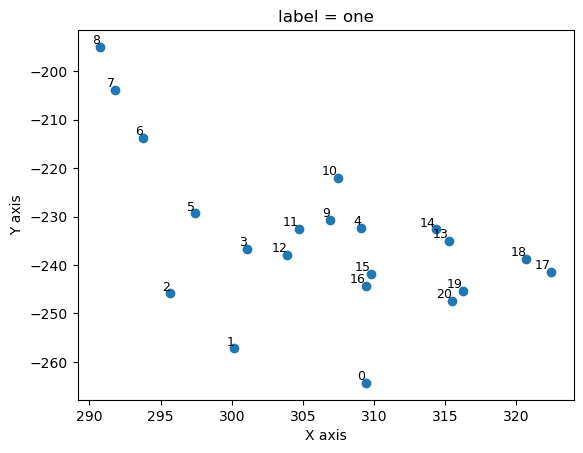

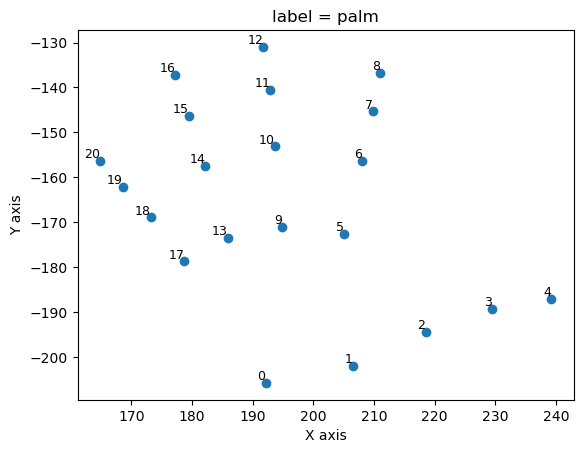

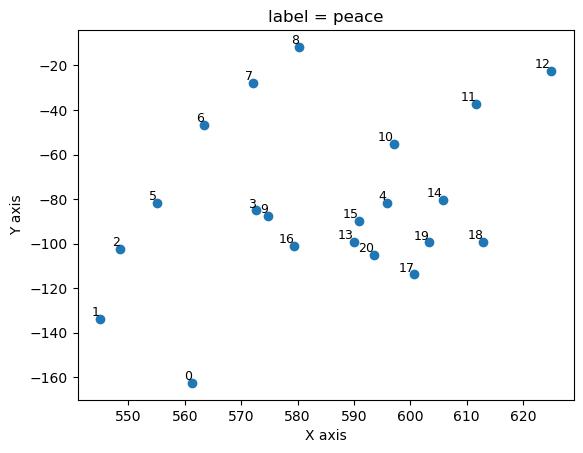

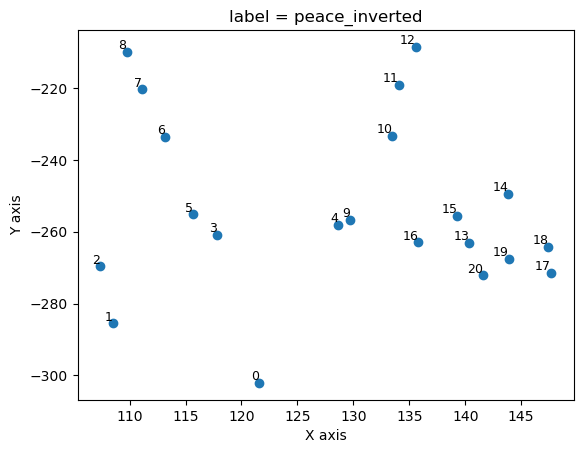

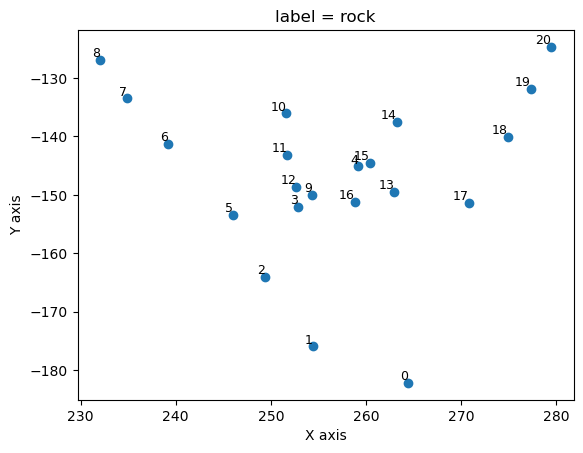

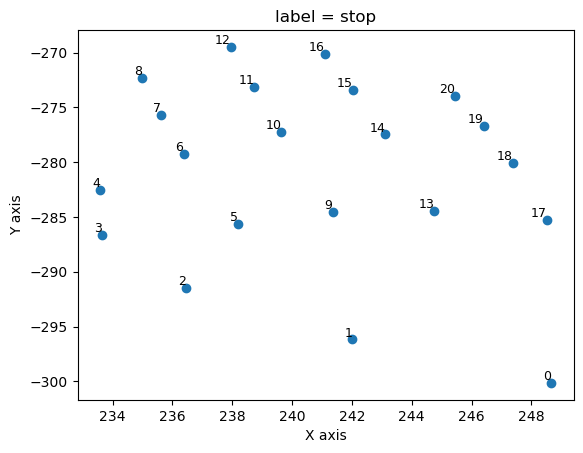

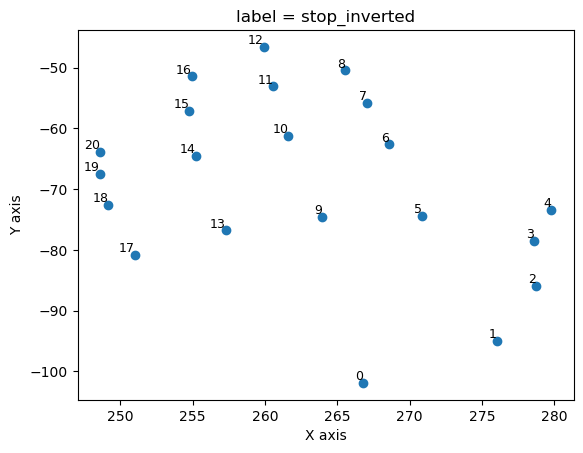

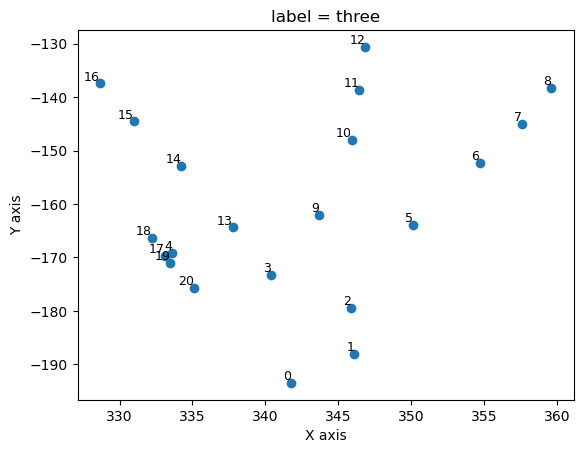

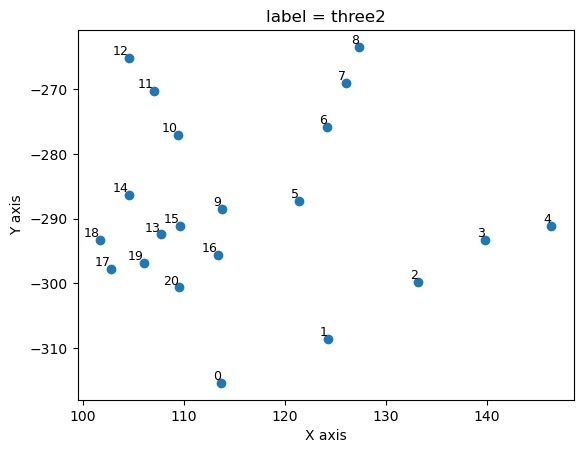

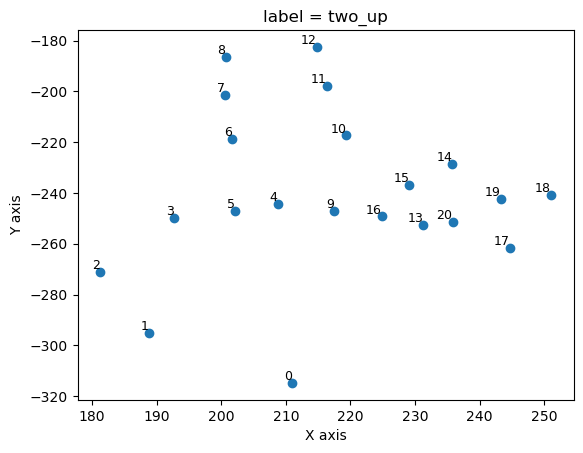

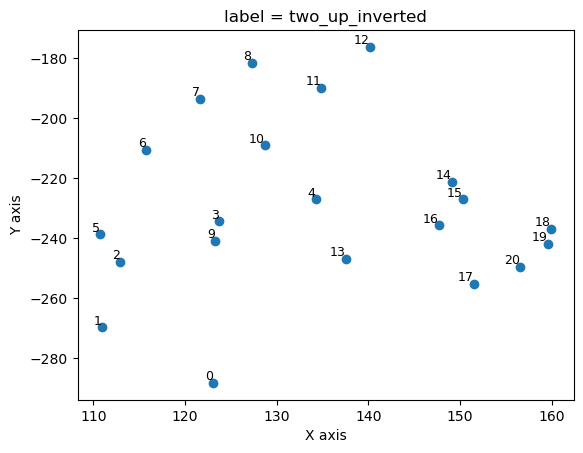

In [11]:
labels = df['label'].unique()
for label in labels:
    x = []
    y = []
    row = df[df['label'] == label].iloc[0]
    for i in range(1,(len(df.columns)+4)//3):
        x.append(row[f'x{i}'])
        y.append(-row[f'y{i}']) # for the sake of visualization only
    fig ,ax = plt.subplots()
    ax.scatter(x, y, marker = 'o', label=label)
    for idx, (xi, yi) in enumerate(zip(x, y)):
        ax.text(xi, yi, str(idx), fontsize=9, ha='right', va='bottom')  # Annotate each point with its number
    # Set labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f'label = {label}')
    plt.show()

It is somehow hard for some gestures to grasp it looking at the points like that but for gestures as; Like, Dislike, three, three2, and four it is pretty easy to recognize them from these plots.

**Notice that**: looking at the the figures you can see that the x-axis and y-axis data are inconsistent, this is due to the camera capturing the hand from different angles and views. We will need to normalize the data points in the preprocessing part.

Next: let's check the amounts of data for each class:

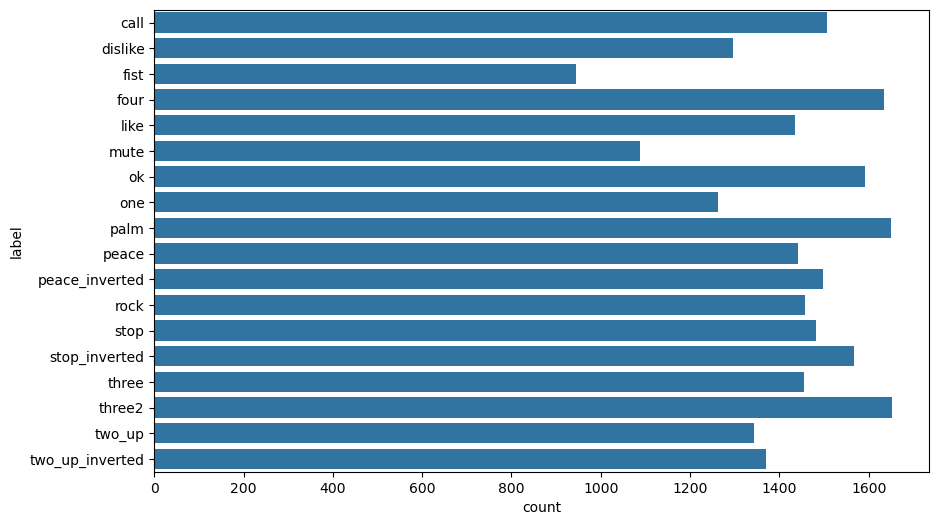

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df)
plt.show()

Each class has enough data points for the model to train on. The least one is the fist class. It has a little less than 1000 but let's check

In [ ]:
df[df['label']=='fist'].__len__()

945

To make sure that the distributions of data points for each class in training and test sets are preserved, we will do stratified sampling when we split the data.

# Data Preprocessing

Normalizing the data:

To make the points in the same scale we need to get each finger point relative positino to the center of the hand. So we will subtract the center of the hand from each point then scale the data by dividing by hand length using the point 13 which is the tip of the middle finger. Because after centering around point zero, y1 will be zero for all points. so y13 gives us the hand length.

This will give us points with consistent numbers for each class so the model can train and predict correctly and in a stable manner.

We don't need to do anything with the z as its values are already processed as seen from the data. Let's check that:

In [4]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958633,260.158539,1.272462e-07,202.517410,252.115326,-0.009465,202.862976,240.645981,-0.015946,203.025284,...,-0.024129,201.792389,227.455582,-0.033751,201.811279,227.802597,-0.032208,201.874802,227.807281,-0.028828
std,90.500282,76.533104,2.737928e-07,84.770943,75.384621,0.010376,80.412003,74.721848,0.013973,79.647621,...,0.015658,94.046410,77.231247,0.020453,93.664497,78.441154,0.020877,93.546951,79.963226,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489952,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815956,-5.243216e-08,130.535927,197.999626,-0.015199,136.711037,187.018585,-0.023020,138.905815,...,-0.030728,126.828915,172.720390,-0.042726,126.887405,172.345467,-0.041957,126.356625,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979523,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453278,222.485229,-0.025269
75%,266.428482,304.991669,2.989988e-07,261.147461,296.850769,-0.002783,255.876358,284.925995,-0.007134,254.622765,...,-0.013661,268.103928,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324661,275.805222,-0.014294
max,633.556030,781.674438,1.876254e-06,606.232361,751.869446,0.076365,598.541321,719.364990,0.094131,607.999817,...,0.031774,632.923035,779.419922,0.078105,638.134766,760.854126,0.104580,641.788513,760.554871,0.118668


notice that all z values are approximately zero

We will define a function to normalize the data for each pair of (x,y) columns in the dataframe. Because we will need this function when we test the output in real time using mediapipe.

In [5]:
def normalize_hand_landmarks(df):
    """Normalize hand landmark coordinates by centering around (x1, y1) and scaling by (y13)."""
    
    # Center around (x1, y1) -- x1, y1 should be the origin for the hand landmarks
    df.iloc[:, 0:-1:3] -= df['x1'].values[:, None]  # Subtract x1 from all x-coordinates
    df.iloc[:, 1:-1:3] -= df['y1'].values[:, None]  # Subtract y1 from all y-coordinates

    # Scale using the hand length by dividing by (y13)
    mid_y = df['y13'].values
    df.iloc[:, 0:-1:3] /= mid_y[:, None]  # Normalize x-coordinates
    df.iloc[:, 1:-1:3] /= mid_y[:, None]  # Normalize y-coordinates

    return df

# Example usage
df = normalize_hand_landmarks(df)

In [6]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.0,25675.0,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,0.0,0.0,1.272462e-07,0.182009,-0.173589,-0.009465,0.472819,-0.343666,-0.015946,0.617885,...,-0.024129,1.321237,0.514327,-0.033751,1.754888,0.691892,-0.032208,2.146973,0.768556,-0.028828
std,0.0,0.0,2.737928e-07,60.291664,90.715675,0.010376,147.585464,179.688370,0.013973,200.620407,...,0.015658,339.041687,29.722412,0.020453,406.320129,40.396996,0.020877,466.645477,47.514034,0.021136
min,-0.0,-0.0,-2.029986e-06,-1748.316406,-14021.500000,-0.096630,-3938.648193,-28028.978516,-0.155846,-5778.232422,...,-0.201897,-6210.508789,-3369.137207,-0.286821,-7508.429688,-2870.314209,-0.286470,-8628.327148,-2576.552979,-0.262047
25%,-0.0,-0.0,-5.243216e-08,-0.179693,0.084815,-0.015199,-0.309581,0.240539,-0.023020,-0.370647,...,-0.030728,-0.256563,0.405562,-0.042726,-0.252314,0.332888,-0.041957,-0.241291,0.265834,-0.039220
50%,0.0,0.0,1.497277e-07,-0.092085,0.132466,-0.008737,-0.083716,0.318590,-0.014231,-0.024833,...,-0.020969,0.065812,0.528137,-0.029942,0.042277,0.586597,-0.028510,0.025175,0.567820,-0.025269
75%,-0.0,-0.0,2.989988e-07,0.167840,0.274876,-0.002783,0.282333,0.720535,-0.007134,0.314879,...,-0.013661,0.259815,0.645612,-0.019987,0.258452,0.732230,-0.017971,0.248611,0.793956,-0.014294
max,-0.0,-0.0,1.876254e-06,9325.717773,2703.575195,0.076365,22893.609375,4235.641602,0.094131,31022.716797,...,0.031774,53214.085938,2161.379883,0.078105,64081.414062,4961.608887,0.104580,73790.304688,6477.239258,0.118668


Something is wrong, max and min values of points are in the zones of thousands, let's plot a box plot for data.

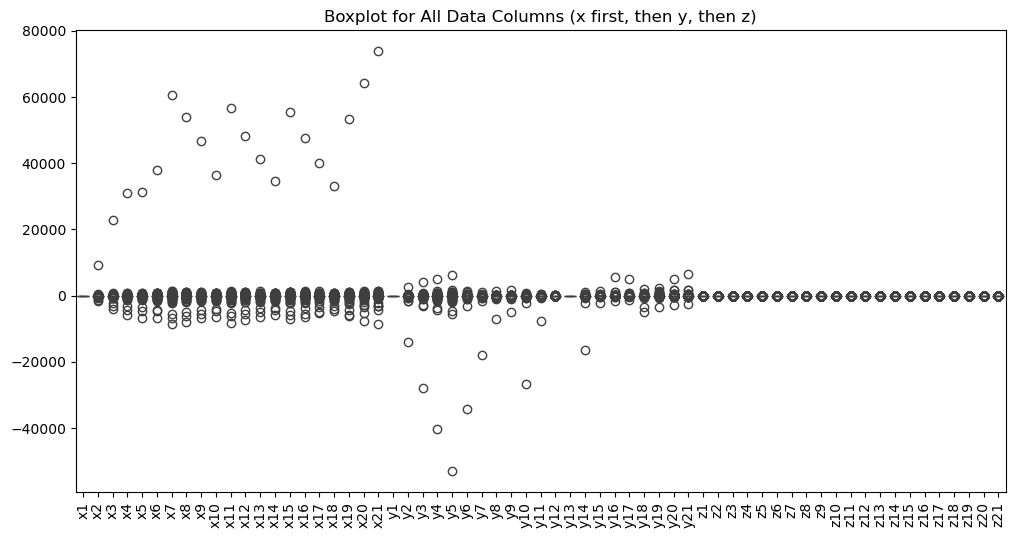

In [ ]:
data_cols = df.columns[:-1]  # Exclude the label column

# Split columns into x, y, and z groups
x_columns = [col for col in data_cols if col.startswith('x')]
y_columns = [col for col in data_cols if col.startswith('y')]
z_columns = [col for col in data_cols if col.startswith('z')]

# Reorder columns as x's first, then y's, then z's
ordered_columns = x_columns + y_columns + z_columns

# Create a new DataFrame with the ordered columns
df_data = df[ordered_columns].copy()

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Boxplot for All Data Columns (x first, then y, then z)')
plt.show()

Aha, I think I understand what happens here. If at some point the y13 is less than 1 , the value of any coordinate will be increasing instead of decreasing. for instance if x4 for example is 300 and y13 is 0.2 then x4/y13 becomes 1500 and the value of x4 will increase instead. But these outliers are extremely little in numbers as seen in the box plot, the data has 25k columns of which the model will train on 23k, I also consider these outliers to be informative for model prediction in real scenarios because it may be encountered. But the chances of it are low anyway.

Splitting the data:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
x = df.drop(['label','x1','x2'], axis=1)    #X1,X2 are not useful they are all zeros
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['label'])

X_train, X_val_test, y_train, y_val_test = train_test_split(x, y_encoded, test_size=0.2, stratify = y_encoded,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify = y_val_test, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20540, 61), (20540,), (2567, 61), (2567,), (2568, 61), (2568,))

# Model Development

In [8]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBRFClassifier

In [9]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    training_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    print("Model: ",model)
    print("Training Accuracy:", accuracy_score(y_train, training_pred))
    print("Training Classification Report:\n", classification_report(y_train, training_pred,digits=4))

    print("Validation Accuracy:", accuracy_score(y_val, val_pred))
    print("Validation Classification Report:\n", classification_report(y_val, val_pred,digits=4))

    print("Validation Confusion Matrix:\n", confusion_matrix(y_val, val_pred))
    return model
    

Logistic Regression:

In [ ]:
lr_model = LogisticRegression(max_iter=20000,n_jobs=-1,warm_start=True,C=0.1,random_state=0)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.22      0.32       150
           1       0.74      0.60      0.66       130
           2       0.83      0.95      0.89        95
           3       0.66      0.45      0.53       163
           4       0.64      0.76      0.70       144
           5       0.78      0.70      0.74       109
           6       0.96      1.00      0.98       159
           7       0.77      0.86      0.81       127
           8       0.45      0.95      0.61       165
           9       0.26      0.10      0.15       144
          10       0.46      0.77      0.57       149
          11       0.93      0.98      0.95       146
          12       0.81      0.49      0.61       148
          13       0.86      0.71      0.77       156
          14       0.89      0.88      0.89       145
          15       0.36      0.79      0.49       165
          16       0.47      0.05      0.09       135
          17       0.56    

/home/hossam/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression fails to converge, no matter how much you try and it doesn't exceed 68 % in accuracy after 20000 iterations and trying many different hyperparameters.

K Nearest Neighbors:

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4, n_jobs=-1,weights='distance')

evaluate_model(knn_model, X_train, y_train, X_val, y_val)

Model:  KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Training Accuracy: 1.0
Training Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1205
           1     1.0000    1.0000    1.0000      1036
           2     1.0000    1.0000    1.0000       756
           3     1.0000    1.0000    1.0000      1307
           4     1.0000    1.0000    1.0000      1149
           5     1.0000    1.0000    1.0000       870
           6     1.0000    1.0000    1.0000      1274
           7     1.0000    1.0000    1.0000      1010
           8     1.0000    1.0000    1.0000      1319
           9     1.0000    1.0000    1.0000      1153
          10     1.0000    1.0000    1.0000      1198
          11     1.0000    1.0000    1.0000      1166
          12     1.0000    1.0000    1.0000      1186
          13     1.0000    1.0000    1.0000      1253
          14     1.0000    1.0000    1.0000      1165
    

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

After running the above knn_model multiple times and trying different hyperparameters, the best knn model is with 4 neighbors. It is relatively highly accurate, its lowest performance scores are for class 1 and class 4.

Decision Tree:

In [ ]:
Dt_model = DecisionTreeClassifier(criterion='gini',max_depth=13,random_state=42)

evaluate_model(Dt_model, X_train, y_train, X_val, y_val)

Model:  DecisionTreeClassifier(max_depth=13, random_state=42)
Training Accuracy: 0.98539435248296
Training Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9892    0.9942      1205
           1     0.9971    0.9961    0.9966      1036
           2     0.9987    0.9947    0.9967       756
           3     0.9519    0.9839    0.9676      1307
           4     0.9896    0.9965    0.9931      1149
           5     0.9931    0.9966    0.9948       870
           6     0.9945    0.9976    0.9961      1274
           7     0.9911    0.9901    0.9906      1010
           8     0.9900    0.9735    0.9817      1319
           9     0.9882    0.9480    0.9677      1153
          10     0.9908    0.9891    0.9900      1198
          11     1.0000    0.9991    0.9996      1166
          12     0.9523    0.9755    0.9638      1186
          13     0.9879    0.9785    0.9832      1253
          14     0.9947    0.9674    0.9809      1165
    

DecisionTreeClassifier(max_depth=13, random_state=42)

Tried multiple tree depths, criterions: (gini, entropy, log_loss), max_features and these were the best hyperparameters for the decision tree model. But it is not better than KNN.

In [ ]:
from sklearn.model_selection import GridSearchCV
svc = SVC(decision_function_shape='ovr', random_state=42)  # Default for multiclass

param_grid = {
    'C': [300,350,400],
    'gamma': [0.05],
    'kernel': ['rbf']
}

# Grid search with 4-fold CV, verbose output
grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=4,
    scoring='accuracy',
    verbose=4,
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)

print("\nBest Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_val, y_pred, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nAccuracy Score:", accuracy_score(y_val, y_pred))

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[CV 3/4] END .....C=300, gamma=0.05, kernel=rbf;, score=0.973 total time=  31.9s
[CV 4/4] END .....C=300, gamma=0.05, kernel=rbf;, score=0.968 total time=  35.6s
[CV 1/4] END .....C=300, gamma=0.05, kernel=rbf;, score=0.965 total time=  40.4s
[CV 2/4] END .....C=300, gamma=0.05, kernel=rbf;, score=0.967 total time=  41.2s
[CV 1/4] END .....C=350, gamma=0.05, kernel=rbf;, score=0.966 total time=  38.1s
[CV 2/4] END .....C=350, gamma=0.05, kernel=rbf;, score=0.968 total time=  38.9s
[CV 4/4] END .....C=350, gamma=0.05, kernel=rbf;, score=0.968 total time=  37.6s
[CV 3/4] END .....C=350, gamma=0.05, kernel=rbf;, score=0.973 total time=  39.1s
[CV 1/4] END .....C=400, gamma=0.05, kernel=rbf;, score=0.965 total time=  36.6s
[CV 2/4] END .....C=400, gamma=0.05, kernel=rbf;, score=0.968 total time=  34.1s
[CV 3/4] END .....C=400, gamma=0.05, kernel=rbf;, score=0.974 total time=  36.5s
[CV 4/4] END .....C=400, gamma=0.05, kernel=rbf;, score=0.969 total time=  36.0s

Best Parameters: {'C': 400,

In [ ]:
svc_model = SVC(C=300,gamma=0.02,kernel='rbf',random_state=42)

evaluate_model(svc_model, X_train, y_train, X_val, y_val)

Model:  SVC(C=300, gamma=0.02, random_state=42)
Training Accuracy: 0.989240506329114
Training Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1205
           1     1.0000    0.9990    0.9995      1036
           2     1.0000    0.9987    0.9993       756
           3     0.9759    0.9931    0.9845      1307
           4     0.9991    1.0000    0.9996      1149
           5     0.9874    0.9874    0.9874       870
           6     0.9976    0.9953    0.9965      1274
           7     0.9891    0.9861    0.9876      1010
           8     0.9893    0.9841    0.9867      1319
           9     0.9842    0.9705    0.9773      1153
          10     0.9949    0.9758    0.9853      1198
          11     0.9983    0.9991    0.9987      1166
          12     0.9614    0.9882    0.9746      1186
          13     0.9904    0.9872    0.9888      1253
          14     0.9938    0.9674    0.9804      1165
          15     

SVC(C=300, gamma=0.02, random_state=42)

The SVC so far is very good, better than KNN and Decision Tree. I have determined that C=300 and gamma=0.02 are the best hyperparameters for this model after many trials.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1, warm_start=True,criterion='gini')

evaluate_model(rf_model, X_train, y_train, X_val, y_val)

Model:  RandomForestClassifier(n_jobs=-1, random_state=42, warm_start=True)
Training Accuracy: 1.0
Training Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1205
           1     1.0000    1.0000    1.0000      1036
           2     1.0000    1.0000    1.0000       756
           3     1.0000    1.0000    1.0000      1307
           4     1.0000    1.0000    1.0000      1149
           5     1.0000    1.0000    1.0000       870
           6     1.0000    1.0000    1.0000      1274
           7     1.0000    1.0000    1.0000      1010
           8     1.0000    1.0000    1.0000      1319
           9     1.0000    1.0000    1.0000      1153
          10     1.0000    1.0000    1.0000      1198
          11     1.0000    1.0000    1.0000      1166
          12     1.0000    1.0000    1.0000      1186
          13     1.0000    1.0000    1.0000      1253
          14     1.0000    1.0000    1.0000      1165
   

RandomForestClassifier(n_jobs=-1, random_state=42, warm_start=True)

Unlike SVC classification metrics, the RF model has a better overall performance and it can be seen in the classification report through precision, recall, and f1 scores. The difference may not be much but for some classes the RF model is much better than the SVC model.

Also 100 estimators is the best number of trees for this model. After trying many different max_depths, leaving it to default value is the best for this model.

In [ ]:
lgbm = LGBMClassifier(random_state=42, n_jobs=-1,force_col_wise=True)

evaluate_model(lgbm, X_train, y_train, X_val, y_val) 

[LightGBM] [Info] Total Bins 15045
[LightGBM] [Info] Number of data points in the train set: 20540, number of used features: 59
[LightGBM] [Info] Start training from score -2.835895
[LightGBM] [Info] Start training from score -2.987007
[LightGBM] [Info] Start training from score -3.302088
[LightGBM] [Info] Start training from score -2.754640
[LightGBM] [Info] Start training from score -2.883482
[LightGBM] [Info] Start training from score -3.161636
[LightGBM] [Info] Start training from score -2.780213
[LightGBM] [Info] Start training from score -3.012424
[LightGBM] [Info] Start training from score -2.745500
[LightGBM] [Info] Start training from score -2.880007
[LightGBM] [Info] Start training from score -2.841721
[LightGBM] [Info] Start training from score -2.868795
[LightGBM] [Info] Start training from score -2.851788
[LightGBM] [Info] Start training from score -2.796834
[LightGBM] [Info] Start training from score -2.869653
[LightGBM] [Info] Start training from score -2.743228
[LightGB

LGBMClassifier(force_col_wise=True, n_jobs=-1, random_state=42)

LightGBM is the best performing model so far. It has the highest scores overall for accuracy precision, recall, and f1 scores. Yet after trying many different hyperparameters, its performance is not increased much. So we will leave it at that.

In [ ]:
xgb_model = XGBRFClassifier(random_state=42)

evaluate_model(xgb_model, X_train, y_train, X_val, y_val)

Model:  XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=42, reg_alpha=None, ...)
Training Accuracy: 0.9547711781888997
Training Classification Report:
               precision    recall  f1-score   support

           0     0.9641    0.9817    0.9729      1205
           1     

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=42, reg_alpha=None, ...)

In [ ]:
print(sklearn.__version__)

1.6.1


Due to my version of Scikit-Learn being 1.6.1, XGBoost produces a famous error ('super' object has no attribute '__sklearn_tags__'). I don't want to change my Scikit-Learn version, so We will leave it at that.

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=4, n_jobs=-1,weights='distance')),
        ('dt', DecisionTreeClassifier(criterion='gini',max_depth=13,random_state=42)),
        ('svc', SVC(C=300,gamma=0.02,kernel='rbf',random_state=42,probability=True)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1, warm_start=True,criterion='gini')),
        ('lgbm', LGBMClassifier(random_state=42, n_jobs=-1,force_col_wise=True))
    ],
    voting='hard'
)

evaluate_model(voting_clf, X_train, y_train, X_val, y_val)

[LightGBM] [Info] Total Bins 15045
[LightGBM] [Info] Number of data points in the train set: 20540, number of used features: 59
[LightGBM] [Info] Start training from score -2.835895
[LightGBM] [Info] Start training from score -2.987007
[LightGBM] [Info] Start training from score -3.302088
[LightGBM] [Info] Start training from score -2.754640
[LightGBM] [Info] Start training from score -2.883482
[LightGBM] [Info] Start training from score -3.161636
[LightGBM] [Info] Start training from score -2.780213
[LightGBM] [Info] Start training from score -3.012424
[LightGBM] [Info] Start training from score -2.745500
[LightGBM] [Info] Start training from score -2.880007
[LightGBM] [Info] Start training from score -2.841721
[LightGBM] [Info] Start training from score -2.868795
[LightGBM] [Info] Start training from score -2.851788
[LightGBM] [Info] Start training from score -2.796834
[LightGBM] [Info] Start training from score -2.869653
[LightGBM] [Info] Start training from score -2.743228
[LightGB

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=4,
                                                   weights='distance')),
                             ('dt',
                              DecisionTreeClassifier(max_depth=13,
                                                     random_state=42)),
                             ('svc',
                              SVC(C=300, gamma=0.02, probability=True,
                                  random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_jobs=-1, random_state=42,
                                                     warm_start=True)),
                             ('lgbm',
                              LGBMClassifier(force_col_wise=True, n_jobs=-1,
                                             random_state=42))])

From all the best models, I tried to build a voting classifier with these models. The voting classifier performed the best and it's scores are the highest

Also classifying using hard voting is better than soft voting by 0.01 to 0.02 in overall scores. This has become the best model so far. So we will choose this model to be the final model. We will redo the splitting to train the model again on more data. We will train on 90% of the data and test the final test on 10%.

In [10]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(['label','x1','x2'], axis=1)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['label'])

X_tain, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, stratify = y_encoded,random_state=42)

In [11]:
def train_test_final_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    training_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print("Model: ",model)
    print("Training Accuracy:", accuracy_score(y_train, training_pred))
    print("Training Classification Report:\n", classification_report(y_train, training_pred,digits=4))

    print("Test Accuracy:", accuracy_score(y_test, test_pred))
    print("Test Classification Report:\n", classification_report(y_test, test_pred,digits=4))

    print("Test Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
    return model

In [17]:
final_model = VotingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=4, n_jobs=-1,weights='distance')),
        ('svc', SVC(C=300,gamma=0.02,kernel='rbf',random_state=42,probability=True)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1, warm_start=True,criterion='gini')),
        ('lgbm', LGBMClassifier(random_state=42, n_jobs=-1,force_col_wise=True))
    ],
    voting='soft'
)

train_test_final_model(final_model, X_tain, y_train, X_test, y_test)

[LightGBM] [Info] Total Bins 15045
[LightGBM] [Info] Number of data points in the train set: 23107, number of used features: 59
[LightGBM] [Info] Start training from score -2.836334
[LightGBM] [Info] Start training from score -2.987415
[LightGBM] [Info] Start training from score -3.301479
[LightGBM] [Info] Start training from score -2.754193
[LightGBM] [Info] Start training from score -2.883944
[LightGBM] [Info] Start training from score -3.162381
[LightGBM] [Info] Start training from score -2.780365
[LightGBM] [Info] Start training from score -3.011742
[LightGBM] [Info] Start training from score -2.745394
[LightGBM] [Info] Start training from score -2.880082
[LightGBM] [Info] Start training from score -2.842256
[LightGBM] [Info] Start training from score -2.868583
[LightGBM] [Info] Start training from score -2.851954
[LightGBM] [Info] Start training from score -2.796546
[LightGBM] [Info] Start training from score -2.870108
[LightGBM] [Info] Start training from score -2.742703
[LightGB

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=4,
                                                   weights='distance')),
                             ('svc',
                              SVC(C=300, gamma=0.02, probability=True,
                                  random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_jobs=-1, random_state=42,
                                                     warm_start=True)),
                             ('lgbm',
                              LGBMClassifier(force_col_wise=True, n_jobs=-1,
                                             random_state=42))],
                 voting='soft')

You may have noticed that I removed the decision tree classifier from the voting classifier. This cell was run with the decision tree classifier and I found that the voting classifier performed better without the decision tree. The performance increased by 0.35 percent in overall scores (from 98.01 to 98.36).

# Summary of Model Development

| Metrics \ Models                | K Nearest Neighbours | Decision Trees | Support Vector Classifier | Random Forests | LightGBM | Voting Classifier of 4 best models |
|---------------------------------|----------------------|----------------|---------------------------|----------------|----------|-------------------|
| **Accuracy**                    | 96.84                | 94.35          | 97.62                     | 97.7           | 98.09    | **98.36**         |
| **F1 Score (Weighted avg.)**     | 96.85                | 94.36          | 97.63                     | 97.7           | 98.1     | **98.37**         |
| **Recall (Weighted avg.)**       | 96.84                | 94.35          | 97.62                     | 97.7           | 98.09    | **98.36**         |
| **Precision (Weighted avg.)**    | 96.87                | 94.43          | 97.71                     | 97.73          | 98.11    | **98.39**         |


In [18]:
import joblib

In [19]:
# Save model
joblib.dump(final_model, "/media/hossam/01DB4F3124760DF0/Users/Hossam Abdelrazek/Desktop/ITI AI and ML/AI ITI Material/Machine Learning I Supervised/Supervised_ML_Project/Hand-Gestures-Recognition-project-with-mediapipe/MLPack/model.joblib")

# Save encoder
joblib.dump(encoder, "/media/hossam/01DB4F3124760DF0/Users/Hossam Abdelrazek/Desktop/ITI AI and ML/AI ITI Material/Machine Learning I Supervised/Supervised_ML_Project/Hand-Gestures-Recognition-project-with-mediapipe/MLPack/encoder.joblib")

['/media/hossam/01DB4F3124760DF0/Users/Hossam Abdelrazek/Desktop/ITI AI and ML/AI ITI Material/Machine Learning I Supervised/Supervised_ML_Project/Hand-Gestures-Recognition-project-with-mediapipe/MLPack/encoder.joblib']

This marks the end of model development phase. I have saved the model and encoder for future use in the application.

<div style="text-align: center; font-family: 'Cinzel', serif; font-size: 60px; color: #6C4F37;">
  Thank You For Reading This Notebook
</div>
